# **ASSIGNMENT 1**

Author: Jorge Gonzalez Lopez

CWID: A20474413

Semester: Spring 2021


In [3]:
import numpy as np
import scipy.signal as sc
import cmath
import pickle
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers
from keras.utils import to_categorical

import json
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import KFold




%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

## Question 2

In [54]:
X = []
Y = []
for i in range(5):
  with open('/content/drive/MyDrive/CS577 - Deep Learning/Datasets/cifar/data_batch_'+str(i+1), 'rb') as fo:
   dict = pickle.load(fo, encoding='bytes')
  for i in range(len(dict[b'labels'])):
    if dict[b'labels'][i]< 3:
      X.append(dict[b'data'][i])
      Y.append(dict[b'labels'][i])

X = np.vstack(X) 
Y = np.vstack(Y)  

In [55]:
Y = to_categorical(Y)

In [56]:
# Not need to shuffle (it is already)
n_train = int(0.7*X.shape[0])

X_train = X[:n_train]
Y_train = Y[:n_train]

X_val = X[n_train:]
Y_val = Y[n_train:]

In [57]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(3072,)))
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.L2(0.005)))
model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.L2(0.005)))
model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.L2(0.005)))
model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.L2(0.005)))
model.add(keras.layers.Dense(3, activation='softmax'))


In [58]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 3072)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_50 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_51 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_52 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_53 (Dense)             (None, 3)                 195       
Total params: 209,347
Trainable params: 209,347
Non-trainable params: 0
_______________________________________________

In [59]:
opt = optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ["accuracy"])

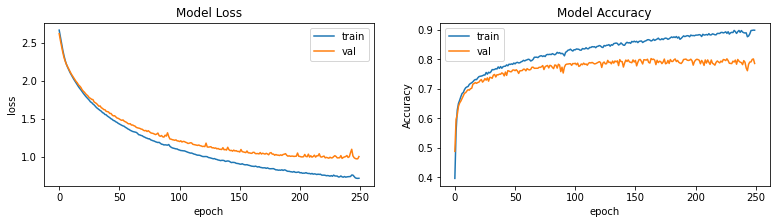

In [60]:
Train = False
if Train:
  history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 250, batch_size = 1024, verbose = 0)

  with open('/content/drive/MyDrive/CS577 - Deep Learning/Models/cifar/history.json', 'w') as f:
      json.dump(history.history, f)

  model.save('/content/drive/MyDrive/CS577 - Deep Learning/Models/cifar/model.h5')

  plt.figure(figsize=(13,3))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'])

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'])
  plt.show()

else:
  model.load_weights('/content/drive/MyDrive/CS577 - Deep Learning/Models/cifar/model.h5')

  with open('/content/drive/MyDrive/CS577 - Deep Learning/Models/cifar/history.json', 'r') as f:
    history = json.load(f)

  plt.figure(figsize=(13,3))
  plt.subplot(1,2,1)
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'])

  plt.subplot(1,2,2)
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'])
  plt.show()


#new_model = keras.models.load_model('/content/drive/MyDrive/CS577 - Deep Learning/Models/cifar/model.h5')


In [61]:
## TEST
X_test = []
Y_test = []
with open('/content/drive/MyDrive/CS577 - Deep Learning/Datasets/cifar/test_batch', 'rb') as fo:
   dict = pickle.load(fo, encoding='bytes')
   for i in range(len(dict[b'labels'])):
    if dict[b'labels'][i]< 3:
      X_test.append(dict[b'data'][i])
      Y_test.append(dict[b'labels'][i])

X_test = np.vstack(X_test) 
Y_test = np.vstack(Y_test)  
Y_test = to_categorical(Y_test)

In [62]:
model.evaluate(X_test, Y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.9703 - accuracy: 0.8064


[0.9793848395347595, 0.8033333420753479]

## Question 3

In [1]:
def load_spam_data(filepath, perc_train):
  data = np.loadtxt(filepath, delimiter=',')

  # Last column is the target: spam or not spam
  X = data[:,:-1]
  Y = data[:,-1].reshape((data.shape[0], 1))
  # Normalization of input data
  X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
  # Data is not shuffle:
  X, Y = shuffle(X, Y, random_state=2021)
  # Split train/val
  n_train = int(perc_train*X.shape[0])

  X_train = X[:n_train]
  Y_train = Y[:n_train]
  X_val = X[n_train:]
  Y_val = Y[n_train:]

  return X_train, Y_train, X_val, Y_val

In [2]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
X_train, Y_train, X_val, Y_val = load_spam_data(path, 0.7)

NameError: name 'np' is not defined

In [65]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(57,)))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 4)                 232       
_________________________________________________________________
dense_55 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 5         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [67]:
opt = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

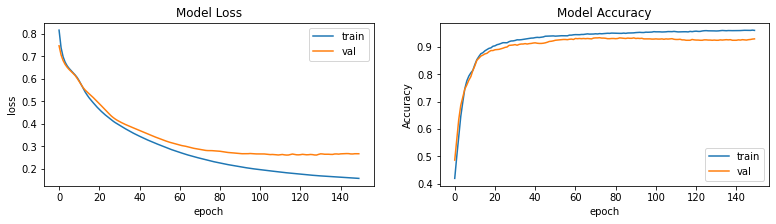

In [68]:
Train = False
if Train:
  history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 150, batch_size = 2048, verbose = 0)

  with open('/content/drive/MyDrive/CS577 - Deep Learning/Models/spambase/history.json', 'w') as f:
      json.dump(history.history, f)

  model.save('/content/drive/MyDrive/CS577 - Deep Learning/Models/spambase/model.h5')

  plt.figure(figsize=(13,3))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'])

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'])
  plt.show()

else:
  model.load_weights('/content/drive/MyDrive/CS577 - Deep Learning/Models/spambase/model.h5')

  with open('/content/drive/MyDrive/CS577 - Deep Learning/Models/spambase/history.json', 'r') as f:
    history = json.load(f)

  plt.figure(figsize=(13,3))
  plt.subplot(1,2,1)
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'])

  plt.subplot(1,2,2)
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'])
  plt.show()


In [69]:
model.evaluate(X_val, Y_val)

44/44 [==============================] - 0s 883us/step - loss: 0.2942 - accuracy: 0.9219


[0.26675984263420105, 0.9297610521316528]

## Question 4

In [70]:
def load_crime_data(path_att, path_data, perc_train):
  attributes = []
  with open(path_att) as file:
      for line in file:    
              if line.split(' ')[0] == '@attribute':
                attributes.append(line.split(' ')[1]) 
  data = pd.read_csv(path_data, delimiter=',', header = None, names=attributes)

  Y = data['ViolentCrimesPerPop']
  X = data.drop(['ViolentCrimesPerPop'], axis=1)

  non_predictive = ['state', 'county', 'community','communityname', 'fold']
  X = X.drop(non_predictive, axis=1)
  
  X = X.replace('?', np.nan)
  na_columns = X.columns[X.isna().any()].tolist()
  X = X.drop(na_columns, axis=1)
  
  X, Y = shuffle(X, Y, random_state=2021)
  # Split train/val
  n_train = int(perc_train*X.shape[0])

  X_train = X.iloc[:n_train]
  Y_train = Y.iloc[:n_train]
  X_val = X.iloc[n_train:]
  Y_val = Y.iloc[n_train:]

  return X_train, Y_train, X_val, Y_val

In [71]:
path_att = '/content/drive/MyDrive/CS577 - Deep Learning/Datasets/communities/communities.names'
path_data = '/content/drive/MyDrive/CS577 - Deep Learning/Datasets/communities/communities.data'
X_train, Y_train, X_val, Y_val = load_crime_data(path_att, path_data, 0.7)

In [72]:
def gen_model(X_train, Y_train, X_val, Y_val):
  model = keras.models.Sequential()
  model.add(keras.Input(shape=(X_train.shape[1],)))
  model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.L2(0.01)))
  model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.L2(0.01)))
  model.add(keras.layers.Dense(1)) # Regression implies no activation
  
  opt = optimizers.RMSprop(learning_rate=0.001)

  model.compile(optimizer = opt, loss = 'mse', metrics = ['mae'])
  history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 150, batch_size = 512, verbose=0)

  return history


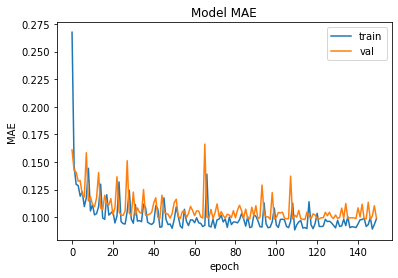

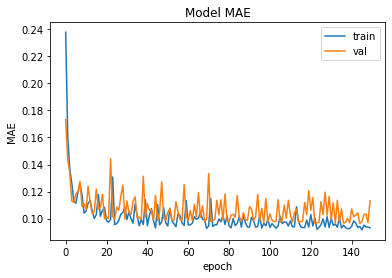

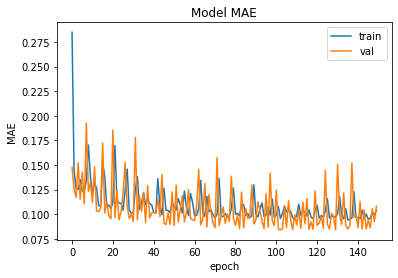

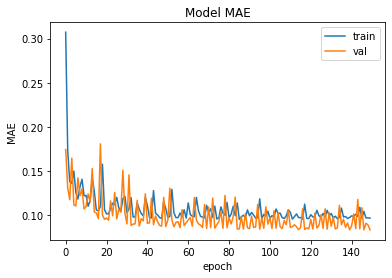

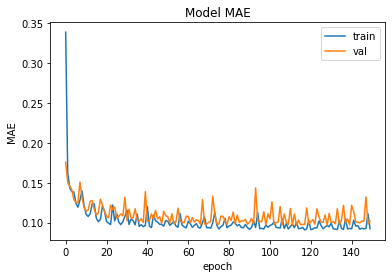

In [73]:
kf = KFold(n_splits=5, shuffle=False)

val_mae_fold = []
for train_index, test_index in kf.split(X_train):
    X_train_k = X_train.iloc[train_index]
    Y_train_k = Y_train.iloc[train_index]
    X_val_k = X_train.iloc[test_index]
    Y_val_k = Y_train.iloc[test_index]
    
    history = gen_model(X_train_k, Y_train_k, X_val_k, Y_val_k)
    val_mae_fold.append(history.history['val_mae'])
    
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    plt.show()

Text(0.5, 0, 'epoch')

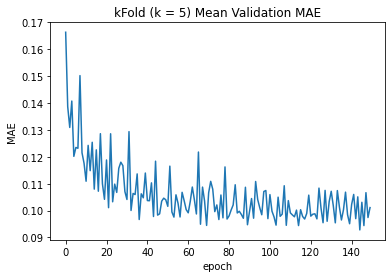

In [74]:
mean_val_loss = np.mean(val_mae_fold, axis=0)

plt.plot(mean_val_loss)
plt.title('kFold (k = 5) Mean Validation MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')

In [75]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.L2(0.01)))
model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.L2(0.01)))
model.add(keras.layers.Dense(1)) # Regression implies no activation
  
opt = optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer = opt, loss = 'mse', metrics = ['mae'])

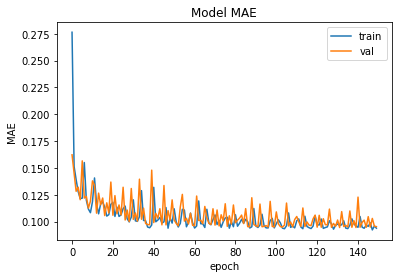

In [76]:
Train = False
if Train:
  
  history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 150, batch_size = 512, verbose=0)

  with open('/content/drive/MyDrive/CS577 - Deep Learning/Models/communities/history.json', 'w') as f:
      json.dump(history.history, f)

  model.save('/content/drive/MyDrive/CS577 - Deep Learning/Models/communities/model.h5')
  
  plt.plot(history.history['mae'])
  plt.plot(history.history['val_mae'])
  plt.title('Model MAE')
  plt.ylabel('MAE')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'])
  plt.show()

else:
  model.load_weights('/content/drive/MyDrive/CS577 - Deep Learning/Models/communities/model.h5')

  with open('/content/drive/MyDrive/CS577 - Deep Learning/Models/communities/history.json', 'r') as f:
      history = json.load(f)

  plt.plot(history['mae'])
  plt.plot(history['val_mae'])
  plt.title('Model MAE')
  plt.ylabel('MAE')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'])
  plt.show()

In [77]:
model.evaluate(X_val, Y_val)

19/19 [==============================] - 0s 1ms/step - loss: 0.0251 - mae: 0.0896


[0.028199296444654465, 0.0952136367559433]